# Simuladores de fila
## Modelagem e Avaliação de Desempenho (MAD)
## Grupo

- Ana Carolina Ferreira de Figueiredo
- Andrew Faria
- Daniel Arruda Ponte
- Paulo Yamagishi

## Imports e Constantes

In [1]:
import numpy as np
import heapq
import scipy
import pandas as pd
import plotly.express as px

In [2]:
CHEGADA = 0
SERVICO = 1

## Implementação




### Simulador 1 (M/M/1)

In [3]:
def simulador1(taxa_chegada, taxa_servico, servico_limite):
  clientes = 0  # Clientes na fila
  tempo_atual = 0
  numero_servicos = 0
  eventos_log = []
  rng = np.random.default_rng()

  while numero_servicos <= servico_limite:
    tprox_chegada = rng.exponential(1/taxa_chegada)
    tprox_servico = rng.exponential(1/taxa_servico)

    if clientes == 0 or tprox_chegada < tprox_servico:
      tempo_atual += tprox_chegada
      clientes += 1
      eventos_log.append((tempo_atual, CHEGADA, clientes))
    else:
      tempo_atual += tprox_servico
      numero_servicos += 1
      clientes -= 1
      eventos_log.append((tempo_atual, SERVICO, clientes))

  return eventos_log

### Simulador 2 (M/M/1)

In [4]:
def simulador2(taxa_chegada, taxa_servico, servico_limite):
   tempo_atual = 0
   clientes = 0
   numero_servicos = 0
   eventos_log = []

   rng = np.random.default_rng()

   lista_de_eventos = [(rng.exponential(1/taxa_chegada), CHEGADA)]
 
   while numero_servicos < servico_limite:  # Tempo em que a simulação ocorre
    tempo_evento, tipo_evento = heapq.heappop(lista_de_eventos) # Pego o evento de maior prioridade (próximo evento de acordo com o tempo)
    
    if tipo_evento == CHEGADA:
      tempo_atual = tempo_evento # Mudo o tempo atual para o tempo do próximo evento
      clientes += 1
      eventos_log.append((tempo_atual, CHEGADA, clientes))  
      tempo_chegada = rng.exponential(1/taxa_chegada) + tempo_atual # Calculando o tempo da próxima chegada
      heapq.heappush(lista_de_eventos, (tempo_chegada, CHEGADA))  # Coloco na fila de prioridade o próximo evento de chegada

      if clientes == 1: # Agendar o próximo serviço quando resta apenas uma pessoa na fila
        tempo_servico = rng.exponential(1/taxa_servico) + tempo_atual
        heapq.heappush(lista_de_eventos, (tempo_servico, SERVICO))
    
    elif tipo_evento == SERVICO:
      tempo_atual = tempo_evento # Mudo o tempo atual para o tempo do próximo evento
      clientes -= 1
      eventos_log.append((tempo_atual, SERVICO, clientes))
      numero_servicos += 1

      if clientes > 0: # Agendar o próximo atendimento
        tempo_servico = rng.exponential(1/taxa_servico) + tempo_atual
        heapq.heappush(lista_de_eventos, (tempo_servico, SERVICO))
   
   return eventos_log

### Simulador 1 (M/G/1 - Serviços Determinísticos)

In [5]:
def simulador1_deterministico(taxa_chegada, taxa_servico, servico_limite):
  clientes = 0  # Clientes na fila
  tempo_atual = 0
  numero_servicos = 0
  eventos_log = []
  rng = np.random.default_rng()

  while numero_servicos <= servico_limite:
    tprox_chegada = rng.exponential(1/taxa_chegada)
    tprox_servico = 1/taxa_servico

    if clientes == 0 or tprox_chegada < tprox_servico:
      tempo_atual += tprox_chegada
      clientes += 1
      eventos_log.append((tempo_atual, CHEGADA, clientes))
    else:
      tempo_atual += tprox_servico
      numero_servicos += 1
      clientes -= 1
      eventos_log.append((tempo_atual, SERVICO, clientes))

  return eventos_log

### Simulador 2 (M/G/1 - Serviços Determinísticos)

In [6]:
def simulador2_deterministico(taxa_chegada, taxa_servico, servico_limite):
   tempo_atual = 0
   clientes = 0
   numero_servicos = 0
   eventos_log = []

   rng = np.random.default_rng()

   lista_de_eventos = [(rng.exponential(1/taxa_chegada), CHEGADA)]
 
   while numero_servicos < servico_limite:  # Tempo em que a simulação ocorre
    tempo_evento, tipo_evento = heapq.heappop(lista_de_eventos) # Pego o evento de maior prioridade (próximo evento de acordo com o tempo)
    
    if tipo_evento == CHEGADA:
      tempo_atual = tempo_evento # Mudo o tempo atual para o tempo do próximo evento
      clientes += 1
      eventos_log.append((tempo_atual, CHEGADA, clientes))  
      tempo_chegada = rng.exponential(1/taxa_chegada) + tempo_atual # Calculando o tempo da próxima chegada
      heapq.heappush(lista_de_eventos, (tempo_chegada, CHEGADA))  # Coloco na fila de prioridade o próximo evento de chegada

      if clientes == 1: # Agendar o próximo serviço quando resta apenas uma pessoa na fila
        tempo_servico = 1/taxa_servico + tempo_atual
        heapq.heappush(lista_de_eventos, (tempo_servico, SERVICO))
    
    elif tipo_evento == SERVICO:
      tempo_atual = tempo_evento # Mudo o tempo atual para o tempo do próximo evento
      clientes -= 1
      eventos_log.append((tempo_atual, SERVICO, clientes))
      numero_servicos += 1

      if clientes: # Agendar o próximo atendimento
        tempo_servico = 1/taxa_servico + tempo_atual
        heapq.heappush(lista_de_eventos, (tempo_servico, SERVICO))
   
   return eventos_log

### Métricas de Interesse

In [7]:
def calcular_tempo_espera(eventos_log):
  chegadas = []
  tempo_espera = []

  for tempo_evento, tipo_evento, _ in eventos_log:
    if tipo_evento == CHEGADA:
      heapq.heappush(chegadas, tempo_evento)
    else:
      tempo_espera.append(tempo_evento - heapq.heappop(chegadas))

  return tempo_espera

In [8]:
def calcular_tempo_medio(eventos_log):
  return np.mean(calcular_tempo_espera(eventos_log)) 

In [9]:
def calcular_media_clientes(eventos_log):
  soma_clientes = 0
  
  for i in range(len(eventos_log)-1):
    soma_clientes += (eventos_log[i+1][0] - eventos_log[i][0]) * eventos_log[i][2]

  return soma_clientes / eventos_log[-1][0]

In [10]:
def calcular_periodo_ocupado(eventos_log, C = 1, U = 0):
  tempo_inicial = -1
  periodo_ocupado = []
  
  for tempo_evento, tipo_evento, clientes in eventos_log:
      if tipo_evento == 0 and clientes == C and tempo_inicial == -1 :
        tempo_inicial = tempo_evento

        if C == U:
          periodo_ocupado.append(0)
          tempo_inicial = -1
      elif tipo_evento == 1 and clientes == U and tempo_inicial >= 0:
        tempo_final = tempo_evento
        periodo_ocupado.append(tempo_final - tempo_inicial)
        tempo_inicial = -1

  return False if len(periodo_ocupado) == 0 else periodo_ocupado

### Testes

In [11]:
# Teste Simulador 1
lista = simulador1(1, 2, 100000)
print(calcular_tempo_medio(lista))
print(calcular_media_clientes(lista))

1.0015172568219635
1.0037448751627411


In [12]:
# Teste Simulador 2
lista = simulador2(1, 2, 1000)
print(calcular_tempo_medio(lista))
print(calcular_media_clientes(lista))

1.0028811448697668
1.014529806676867


In [13]:
print(calcular_periodo_ocupado(lista))

[0.6476088143778167, 1.4118656961783511, 0.034122416458010285, 0.36985882269499015, 0.2768792081922431, 1.877223502077321, 0.10619403402137628, 0.3031604735904665, 0.3957341505761214, 0.04444359300916645, 0.44426162688882087, 0.07134211263401724, 0.28215596008791266, 0.03410072020265886, 0.30265311557548813, 0.48984534129651536, 0.09597550227572782, 1.8878043146776022, 3.253873912011869, 0.1985082408637382, 0.22324836592557062, 0.10345264650143093, 0.11781309724656808, 0.21018765404713236, 0.11936695125275776, 0.3571212157286894, 0.5435032235080328, 0.6061114106143677, 0.22643710132619788, 1.94456011648699, 0.05158804559713559, 0.4915136739576482, 0.09404987692863642, 0.3232199190173688, 0.062248434418940235, 0.8185640728888117, 0.5046738092538021, 0.09290936283775153, 0.17778848380117296, 2.0116577428279925, 1.9538451009765367, 0.33177075260169886, 0.2908669349134527, 0.11332894152725714, 0.17810044796993907, 2.517246597451731, 2.310614920863358, 1.1042433340508069, 0.0464037800892356

In [14]:
# Teste Simulador 2 (Serviços determinísticos)
lista = simulador2_deterministico(1, 2, 1000)
print(calcular_tempo_medio(lista))
print(calcular_media_clientes(lista))

0.7998559229180733
0.8185412022097578


### Diversas Simulações

In [15]:
def n_simulacoes(n, taxa_chegada, taxa_servico, servico_limite, simulador, C = 1, U = 0):
  tempos_medios = []
  medias_clientes = []
  medias_periodo_ocupado = []

  for i in range(n):
    lista_eventos = simulador(taxa_chegada, taxa_servico, servico_limite)

    tempos_medios.append(calcular_tempo_medio(lista_eventos))
    medias_clientes.append(calcular_media_clientes(lista_eventos))

    periodo_ocupado = calcular_periodo_ocupado(lista_eventos, C, U)

    if periodo_ocupado != False:
      medias_periodo_ocupado.append(np.mean(periodo_ocupado))

  return tempos_medios, medias_clientes, medias_periodo_ocupado

### Intervalo de Confiança

In [16]:
def intervalo_confianca(lista):
  desvio_padrao = np.std(lista)
  conf_int = scipy.stats.norm.interval(0.95, loc=np.mean(lista), scale=desvio_padrao)

  return conf_int

In [17]:
t_medio, m_clientes, periodo_ocupado = n_simulacoes(300, 1, 2, 1000, simulador1)

In [18]:
print(intervalo_confianca(t_medio))
print(intervalo_confianca(m_clientes))
print(intervalo_confianca(periodo_ocupado))

(0.8188552077539676, 1.1786880456850177)
(0.7891062808893975, 1.2071555992753489)
(0.8510330482989343, 1.141887983987973)


## Gráficos e métricas de interesse

In [19]:
def plotar_histograma(dados, rotulo):
  x = [x for x in range(len(dados))]

  d = { 'x': x, rotulo: dados }
  d = dict(sorted(d.items(), key=lambda x : x[1]))

  df = pd.DataFrame(data=d)
  fig = px.histogram(df, x=rotulo).show()

### Cenário 1
$λ=1$ e $μ=2$

#### Simulador 1

In [20]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 1, 2, 5000, simulador1)

##### Tempo de espera



In [21]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.9158090884611993, 1.0846039343668534)
Média: 1.0002065114140264



##### Clientes no sistema

In [22]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.9014787002801008, 1.0990147375392982)
Média: 1.0002467189096995



#### Simulador 2

In [23]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 1, 2, 5000, simulador2)

##### Tempo de espera

In [24]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.9174224080087953, 1.0909197684211647)
Média: 1.00417108821498



##### Clientes no sistema

In [25]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.9036296150671411, 1.1072835990543899)
Média: 1.0054566070607656



### Cenário 2

$λ=2$ e $μ=4$

#### Simulador 1

In [26]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 2, 4, 5000, simulador1)

##### Tempo de espera



In [27]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.46056193621748304, 0.5395249513922612)
Média: 0.5000434438048721



##### Clientes no sistema

In [28]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.9067984175543367, 1.0924699755186091)
Média: 0.9996341965364729



#### Simulador 2

In [29]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 2, 4, 5000, simulador2)

##### Tempo de espera



In [30]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.45666099461937437, 0.544639153432316)
Média: 0.5006500740258452



##### Clientes no sistema

In [31]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.9017845383455937, 1.101876817174914)
Média: 1.001830677760254



### Cenário 3

$λ=1$ e $μ=4$ 

#### Simulador 1

In [32]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 1, 4, 5000, simulador1)

##### Tempo de espera



In [33]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.319087632100915, 0.3475366347740814)
Média: 0.3333121334374982



##### Clientes no sistema

In [34]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.3159772607950131, 0.35085730469881327)
Média: 0.3334172827469132



#### Simulador 2

In [35]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 1, 4, 5000, simulador2)

##### Tempo de espera



In [36]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.3178663795493722, 0.3490987226681315)
Média: 0.33348255110875186



##### Clientes no sistema

In [37]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.3134183205779057, 0.35365409818368326)
Média: 0.3335362093807945



### Cenário 4

$λ=1$ e $μ=2$ (Serviço com tempo determinístico)

#### Simulador 1 (Serviço Determinístico)

In [38]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 1, 2, 5000, simulador1_deterministico)

#####Tempo de espera

In [39]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (1.6324685166310742, 2.0443226413435722)
Média: 1.8383955789873232



#####Clientes no Sistema

In [40]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (1.5971006373814869, 2.080797940274761)
Média: 1.838949288828124



#### Simulador 2 (Serviço Determinístico)

In [41]:
tempo_espera, clientes_sistema, _ = n_simulacoes(300, 1, 2, 5000, simulador2_deterministico)

##### Tempo de espera



In [42]:
print(f'Intervalo de confiança: {intervalo_confianca(tempo_espera)}')
print(f'Média: {np.mean(tempo_espera)}\n')

plotar_histograma(tempo_espera, 'Tempo de espera')

Intervalo de confiança: (0.7241316427971296, 0.7748484880179844)
Média: 0.749490065407557



##### Clientes no sistema

In [43]:
print(f'Intervalo de confiança: {intervalo_confianca(clientes_sistema)}')
print(f'Média: {np.mean(clientes_sistema)}\n')

plotar_histograma(clientes_sistema, 'Clientes no sistema')

Intervalo de confiança: (0.7087189582328914, 0.7919849301777697)
Média: 0.7503519442053306



## Tempo até atingir certo estado

### Período ocupado

Seja $ B $ o período ocupado

#### Prova: $ E(B) = \frac{1}{μ(1 - ρ)}$

A taxa média de chegada de clientes é denotada por λ, e a taxa média de atendimento do servidor é representada por μ. Uma fila M/M/1 é um processo estocástico cujo espaço de estados é o conjunto {0, 1, 2, 3...} em que o valor corresponde ao número de clientes no sistema, incluindo aqueles que estão sendo servidos. Um único servidor atende os clientes um por vez no fim da fila, de acordo com a disciplina first-come, first served ("primeiro a chegar, primeiro a ser servido"), Quando o serviço está completo, o cliente deixa a fila e o número de clientes no sistema é reduzido em um.

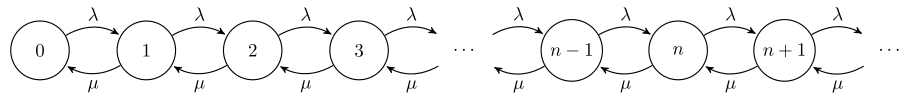

A utilização do servidor, ou seja a proporção de tempo em que o servidor está ocupado com o atendimento de clientes, é a razão entre a taxa de chegada (λ) e a taxa de atendimento (μ), ρ = λ/μ. Logo, a fração de tempo em que o servidor não está ocupado e pode começar a atender um novo cliente imediatamente é 1-ρ
O tempo médio de serviço, o tempo, em média, o servidor leva para atender um cliente (1/μ) é o inverso da taxa de atendimento. 
No sistema M/M/1, a fila segue uma distribuição exponencial, e o tempo médio de espera na fila é dado por 1/(μ - λ).

Quando um cliente chega ao sistema, ele pode encontrar o servidor ocupado ou ocioso. A probabilidade de um cliente encontrar um servidor ocioso é (1 - ρ),logo o tempo médio que o servidor encontra-se ocioso é 1/(1-ρ) e com o servidor ocioso, o cliente será atendido imediatamente, e o período ocupado será apenas o tempo de serviço médio (1/μ), portanto E(B) = (1/μ)/(1-ρ). 

No caso, do cenário apresentado, com $λ=1$ e $μ=2$, temos que E(B) = (1/2)/(1-(1/2)) = 1.


#### Simulação de $E(B)$
$λ=1$ e $μ=2$ 

In [44]:
tempo_espera, clientes_sistema, periodo_ocupado = n_simulacoes(300, 1, 2, 5000, simulador2)

In [45]:
print(f'Intervalo de confiança: {intervalo_confianca(periodo_ocupado)}')
print(f'Média: {np.mean(periodo_ocupado)}\n')

plotar_histograma(periodo_ocupado, 'Período ocupado')

Intervalo de confiança: (0.9364330475916828, 1.066470952797036)
Média: 1.0014520001943594



#### Generalização

##### Explicação: $E(B_C) = \frac{C}{μ(1 - ρ)}$


O período ocupado generalizado é o tempo necessário para o sistema esvaziar completamente, começando com um número inicial de clientes C (sendo C maior ou igual a 2). Ou seja, é o tempo que leva para a fila diminuir até não ter mais nenhum cliente aguardando atendimento.

Quando o sistema começa com C clientes aguardando atendimento, o tempo médio necessário para esvaziar o sistema é C vezes o tempo médio de serviço de um único cliente (C * (1/μ)), uma vez que (1/μ) representa quanto tempo, em média, leva para atender um cliente individualmente. Isso ocorre porque cada cliente precisa ser atendido antes que o sistema fique vazio.

Além disso, (1 - ρ) é a probabilidade de que nenhum cliente esteja sendo atendido, ou seja que o sistema esteja ocioso. Assim, a fração de tempo em que o sistema esta ocupado, ou seja terá ao menos um cliente na fila é 1/(1 - ρ). 

Portanto, o tempo necessário para o sistema esvaziar completamente é dado pela probabilidade de haver algum cliente na fila multiplicado pelo tempo de atendimento do cliente, ou seja $E(B_C) = \frac{C}{μ(1 - ρ)}$.

No cenário apresentado, com $λ=1$ e $μ=2$, temos que:

C=2 => E(B_C) = 2*(1/mu)/(1- ρ) = 2

C=3 => E(B_C) = 3*(1/mu)/(1- ρ) = 3

C=4 => E(B_C) = 4*(1/mu)/(1- ρ) = 4

C=5 => E(B_C) = 5*(1/mu)/(1- ρ) = 5

C=6 => E(B_C) = 6*(1/mu)/(1- ρ) = 6

C=7 => E(B_C) = 7*(1/mu)/(1- ρ) = 7

C=8 => E(B_C) = 8*(1/mu)/(1- ρ) = 8

C=9 => E(B_C) = 9*(1/mu)/(1- ρ) = 9

C=10 => E(B_C) = 10*(1/mu)/(1- ρ) = 10

##### Simulação de $E(B_C)$


In [46]:
C_lista = list(range(2, 11))
periodo_ocupado_C = []
E_BC = []
intervalo_confianca_C = []
periodo_ocupado = []

for C in C_lista:
  periodo_ocupado = n_simulacoes(10000, 1, 2, 300, simulador2, C)[2]

  periodo_ocupado_C.append(periodo_ocupado)
  E_BC.append(np.mean(periodo_ocupado))
  intervalo_confianca_C.append(intervalo_confianca(periodo_ocupado))

[2.10611355245072, 1.7605135015707454, 1.7485843694847698, 2.475948814216185, 2.1128311945603593, 1.8381946106719596, 2.335045408593811, 1.9541553833822412, 1.8246096885172343, 1.7556189393376156, 1.5358768389422173, 1.9682887131883189, 1.8790955028324015, 1.70024631882332, 2.5133242160793037, 1.8588798699617368, 1.908111435574536, 2.243058616457246, 2.006017828680857, 1.5473473071055333, 1.7618824215600157, 2.017581083816706, 2.2998796849936105, 2.194629497444452, 2.3451699374915007, 2.081181306002318, 2.2230082401627267, 2.1034634097468934, 1.6508008196212671, 2.6094013359533696, 2.541865115589167, 2.139530107056937, 1.6763760886208672, 1.5789053721858468, 2.249092051709972, 2.0891100839394467, 2.5801787499195186, 1.8185482088190927, 2.2344519553922377, 3.0537394827437643, 2.946289854739089, 1.4272496836970014, 1.6939620325459495, 1.9023878891180153, 1.9275767534908228, 1.9414365485951197, 1.9242333873250743, 2.078855942920878, 1.9662795927591852, 1.7612634626295558, 2.56538537219786

In [47]:
dict_E_BC = {
    'C': C_lista, 
    'E(B_C)': E_BC,
    'Intervalo de confiança': [abs(E_BC[i] - intervalo_confianca_C[i][0]) for i in range(len(intervalo_confianca_C))],
}

df = pd.DataFrame(dict_E_BC)

df

,C,E(B_C),Intervalo de confiança
0,2,2.003020,0.696568
1,3,2.994794,1.333656
2,4,4.019157,2.335180
3,5,4.961187,3.794519
4,6,5.972678,6.062798
5,7,6.940735,7.923205
6,8,7.865752,8.866601
7,9,8.816258,9.450041
8,10,9.982223,10.552987


In [48]:
fig = px.scatter(df, x='C', y='E(B_C)', 
                 error_y='Intervalo de confiança', error_y_minus='Intervalo de confiança')

fig.show()

Sendo E(B_C) = E(U_C) + E(B), onde E(B) = (1/mu)/(1- ρ) e E(B_C) = C (1/mu)/(1- ρ) para C>=2, em um sistema M/M/1 cujas taxas de chegada e de serviço são lambda=1 e mu=2, respectivamente temos que E(U_C) = (C-1) (1/mu)/(1- ρ)

Para C=1 => E(U_C) = (1/mu)/(1- ρ) = 1

C=2 => E(U_C) = (2-1) (1/mu)/(1- ρ) = 1

C=3 => E(U_C) = (3-1) (1/mu)/(1- ρ) = 2

C=4 => E(U_C) = (4-1) (1/mu)/(1- ρ) = 3

C=5 => E(U_C) = (5-1) (1/mu)/(1- ρ) = 4

C=6 => E(U_C) = (6-1) (1/mu)/(1- ρ) = 5

C=7 => E(U_C) = (7-1) (1/mu)/(1- ρ) = 6

C=8 => E(U_C) = (8-1) (1/mu)/(1- ρ) = 7

C=9 => E(U_C) = (9-1) (1/mu)/(1- ρ) = 8

C=10 => E(U_C) = (10-1) (1/mu)/(1- ρ) = 9


##### Simulação de $E(U_C)$


In [52]:
C_lista = list(range(1, 11))
periodo_ocupado_C = []
E_UC = []
intervalo_confianca_C = []

for C in C_lista:
  periodo_ocupado = n_simulacoes(300, 1, 2, 1000, simulador2, C, 1)[2]
  
  periodo_ocupado_C.append(periodo_ocupado)
  E_UC.append(np.mean(periodo_ocupado))
  intervalo_confianca_C.append(intervalo_confianca(periodo_ocupado))

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning:

invalid value encountered in multiply



In [50]:
dict_E_UC = {
    'C': C_lista, 
    'E(U_C)': E_UC,
    'Intervalo de confiança': [abs(E_UC[i] - intervalo_confianca_C[i][0]) for i in range(len(intervalo_confianca_C))],
}

df = pd.DataFrame(dict_E_UC)

df

,C,E(U_C),Intervalo de confiança
0,1,0.000000,NaN
1,2,0.997060,0.237374
2,3,1.996993,0.512562
3,4,2.969689,0.988978
4,5,4.063902,1.881039
5,6,5.003273,2.847966
6,7,6.049684,5.063714
7,8,7.036641,6.676616
8,9,8.150804,8.361341
9,10,9.105480,9.161062


In [51]:
fig = px.scatter(df, x='C', y='E(U_C)', 
                 error_y='Intervalo de confiança', error_y_minus='Intervalo de confiança')

fig.show()